In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from pandas import Series, DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Understanding

In [ ]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\rainfall in india 1901-2015.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df.shape


(4116, 19)

In [ ]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,291.479450,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,196.943602,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,378.375000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,3372.300000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


Inference:
1. The dataset has 19 features and 4116 entries
2. Data is from 36 subdivisions of time span starting from 1901 to  2015
3. Data contains monthly, annual and seasonal rainfall data

In [ ]:
df['SUBDIVISION'].nunique()

36

# Data Preprocessing Part I
1. Feature Engineering

In [ ]:
# Creating a new data frame containing mean value of annual rainfall in different subdivisions

x=pd.DataFrame(df.groupby("SUBDIVISION")['ANNUAL'].mean())
x

,ANNUAL
SUBDIVISION,
ANDAMAN & NICOBAR ISLANDS,2927.439423
ARUNACHAL PRADESH,3418.857143
ASSAM & MEGHALAYA,2580.695652
BIHAR,1197.633913
CHHATTISGARH,1371.728696
COASTAL ANDHRA PRADESH,1052.904348
COASTAL KARNATAKA,3408.409649
EAST MADHYA PRADESH,1205.000000
EAST RAJASTHAN,655.215652


In [ ]:
x.shape

(36, 1)

In [ ]:
x=x.reset_index() 
x

,SUBDIVISION,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2927.439423
1,ARUNACHAL PRADESH,3418.857143
2,ASSAM & MEGHALAYA,2580.695652
3,BIHAR,1197.633913
4,CHHATTISGARH,1371.728696
5,COASTAL ANDHRA PRADESH,1052.904348
6,COASTAL KARNATAKA,3408.409649
7,EAST MADHYA PRADESH,1205.000000
8,EAST RAJASTHAN,655.215652
9,EAST UTTAR PRADESH,979.213043


In [ ]:
# Creating a new dataframe by merging df and x 

df1 = df.merge(x, on='SUBDIVISION', how='left')

In [ ]:
df1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_x,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,ANNUAL_y
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423


In [ ]:
# Assigning mean value of annual rainfall to dataset as a new column

df['MEAN ANNUAL']=df1['ANNUAL_y']

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423


#Creating a new column as Prediction which predicts 'flood', if annual rainfall is 25% greater than mean of annual rainfall of that subdivision, if 25% lesser than the the mean of annual rainfall of that subdivision, predict "drought"  if otherwise 'normal'



In [ ]:
#Creating a new column as Prediction which predicts flood as yes(1) if sum of monthly rainfall is greater than 25% of the mean of annual rainfall of that subdivision and no(0) if otherwise
df.loc[df['ANNUAL']>=(df['MEAN ANNUAL']*125/100),'Prediction']="Flood"
df.loc[df['ANNUAL']<=(df['MEAN ANNUAL']*75/100),'Prediction']="Drought"
df['Prediction'].fillna('Normal', inplace=True)


In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423,Normal
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423,Normal
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423,Normal
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423,Normal
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423,Normal


In [ ]:
df.Prediction.nunique()

3

In [ ]:
df['Prediction'].value_counts()

Normal     3296
Flood       419
Drought     401
Name: Prediction, dtype: int64

Missing value identification and handling
Numeric Data: Inputing with Mean/Median/Mode/Backward fill/ Forward fill. Null values are replaced with mean/median.mode in this method. 
The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value.

Categorical Data Replacing those null values with most frequent value among them

In [ ]:
df.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
MEAN ANNUAL     0
Prediction      0
dtype: int64

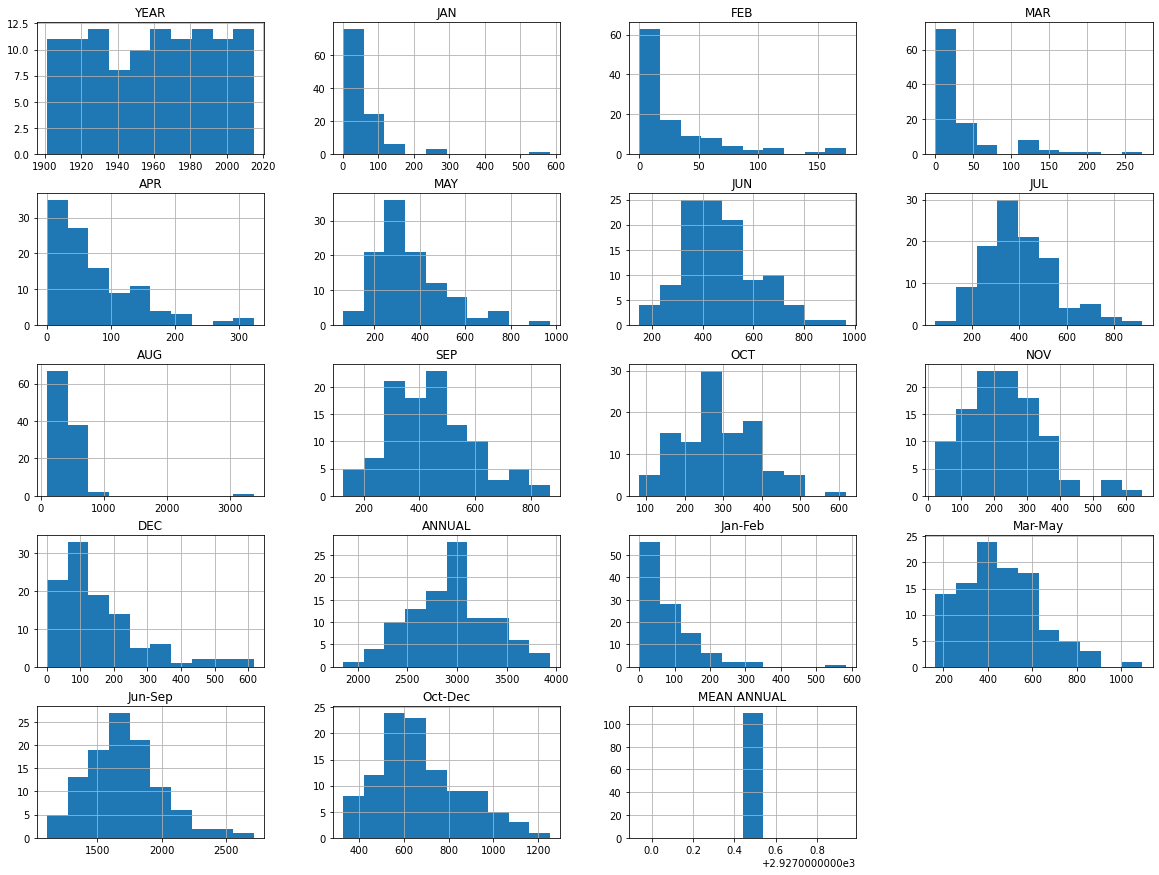

In [ ]:
freqgraph=df[df['SUBDIVISION']=='ANDAMAN & NICOBAR ISLANDS']
freqgraph.hist(figsize=(20,15))
plt.show()

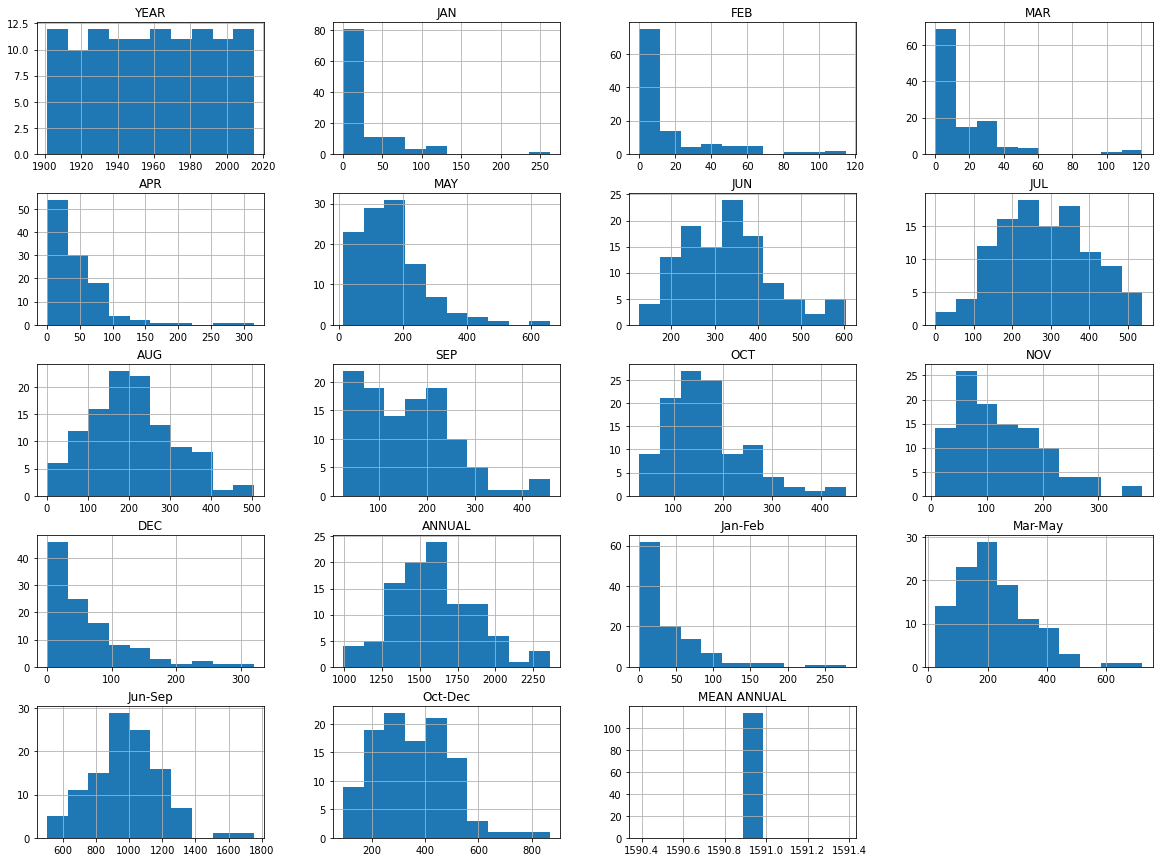

In [ ]:
freqgraph=df[df['SUBDIVISION']=='LAKSHADWEEP']
freqgraph.hist(figsize=(20,15))
plt.show()

From the above frequency graph we can see that different parameters have different distribution(mostly normal distribution), so we will be taking mean of the each column in that subdivision to fill missing values

In [ ]:
for x in df['SUBDIVISION'].unique():
    for i in ['JAN']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['JAN'].mean()) 
    for i in ['FEB']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['FEB'].mean()) 
    for i in ['MAR']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['MAR'].mean())
    for i in ['APR']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['APR'].mean()) 
    for i in ['MAY']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['MAY'].mean()) 
    for i in ['JUN']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['JUN'].mean()) 
    for i in ['JUL']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['JUL'].mean()) 
    for i in ['AUG']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['AUG'].mean()) 
    for i in ['SEP']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['SEP'].mean())
    for i in ['OCT']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['OCT'].mean()) 
    for i in ['NOV']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['NOV'].mean()) 
    for i in ['DEC']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['DEC'].mean()) 
    for i in ['ANNUAL']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['ANNUAL'].mean()) 
    for i in ['Jan-Feb']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['Jan-Feb'].mean())
    for i in ['Mar-May']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['Mar-May'].mean()) 
    for i in ['Jun-Sep']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['Jun-Sep'].mean()) 
    for i in ['Oct-Dec']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['Oct-Dec'].mean()) 

In [ ]:
df.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
MEAN ANNUAL    0
Prediction     0
dtype: int64

# Exploratory data Analysis

In [ ]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'MEAN ANNUAL', 'Prediction'],
      dtype='object')

# Highest Rainfall ever received in a year in Subdivisions

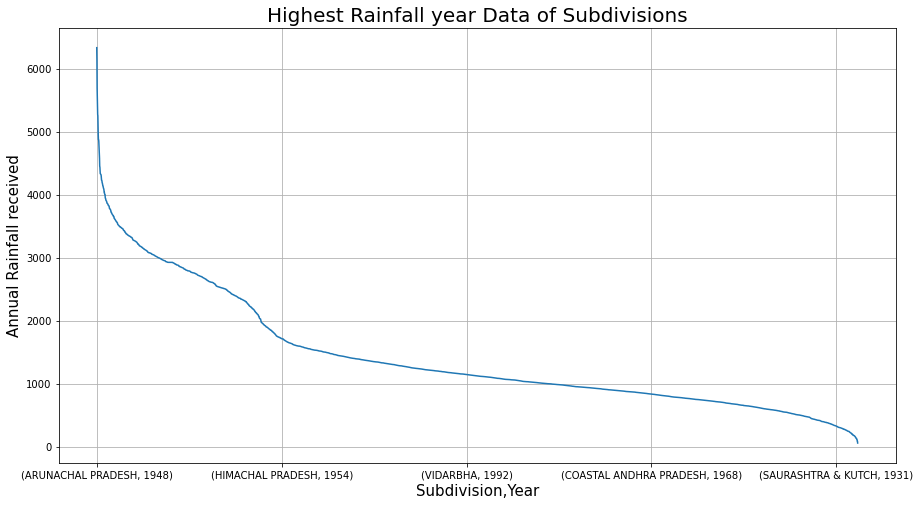

In [ ]:
plt.figure(figsize=(15,8))
df.groupby(['SUBDIVISION','YEAR'])['ANNUAL'].sum().sort_values(ascending=False).plot()

plt.grid()
plt.xlabel("Subdivision,Year",fontsize=15)
plt.ylabel("Annual Rainfall received",fontsize=15)
plt.title('Highest Rainfall year Data of Subdivisions',fontsize=20);

Insight:

    Here, the plot represents the analysis of the highest amount of annual rainfall recieved in the states , over the span of years from 1901-2015. From here, we can infer that the highest amount of rainfall ever received in span of given data is in year 1948, in the Sub Division of Arunachal Pradesh.

# Total amount of rainfall recieved overall by each subdivision

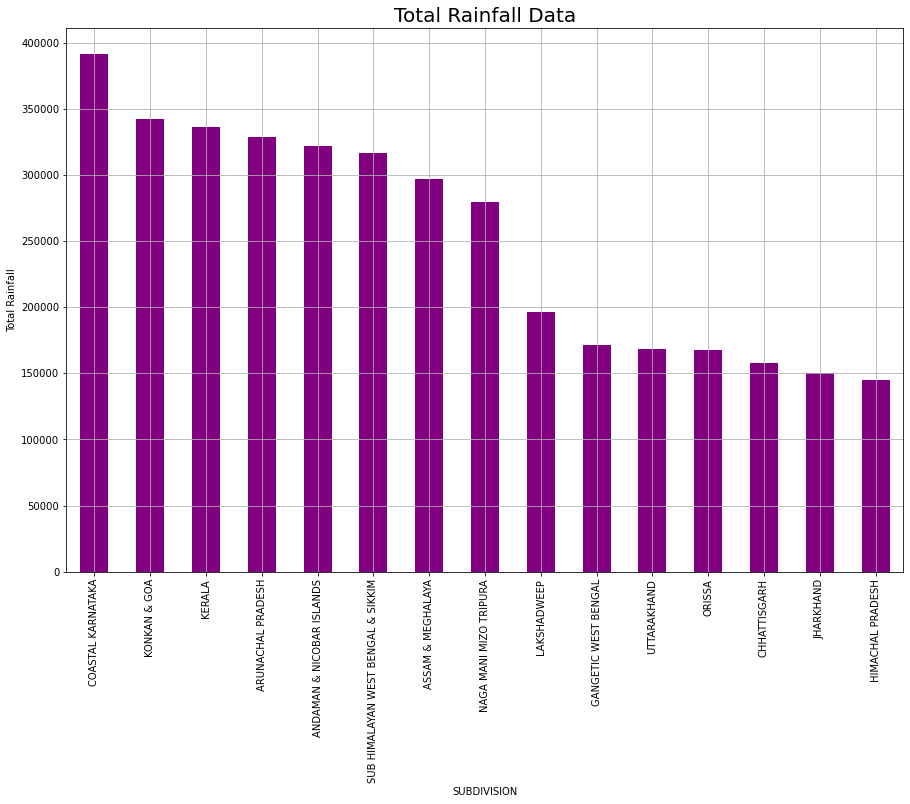

In [ ]:
plt.figure(figsize=(15,10))
df.groupby(['SUBDIVISION'])['ANNUAL'].sum().sort_values(ascending=False).head(15).plot(kind='bar', color = 'purple')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall Data',fontsize=20)
plt.grid();

Insight:

Here, the plot represents the analysis of the total amount of annual rainfall recieved in the subdivisions , over the total span of years from 1901-2015. From here, we can infer that the highest amount of rainfall receiving Sub Division is Coastal Karnataka

# The month with the hightest rainfall

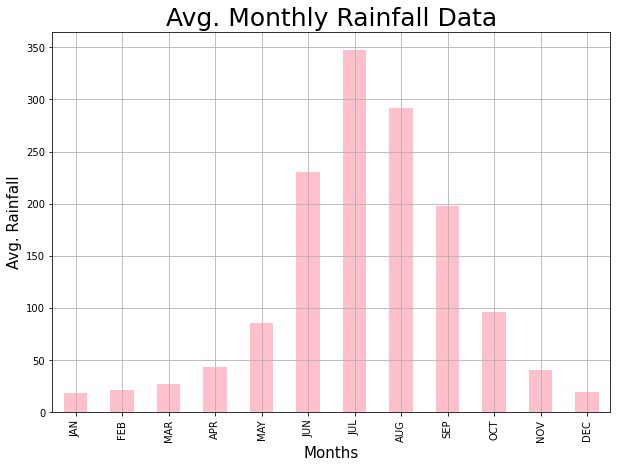

In [ ]:
plt.figure(figsize=(10,7))
df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC']].mean().plot(kind= 'bar', color='pink')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Avg. Rainfall',fontsize=15)
plt.title('Avg. Monthly Rainfall Data',fontsize=25)
plt.grid()
plt.show();

Insight:

From graph, we analysed July has the most rainfall on average. By contrast, December and Jan have the least rainfall. Moreover, there are many differences in rainfall amount among months.

# Seasonwise Rainfall in India

<Figure size 720x144 with 0 Axes>

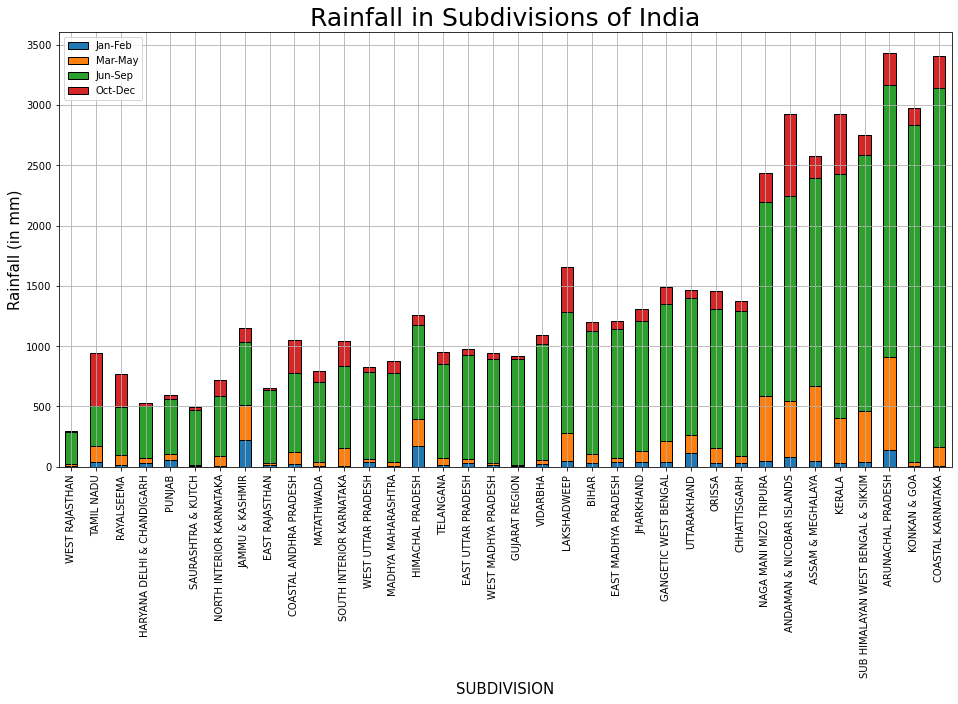

In [ ]:
plt.figure(figsize=(10,2))
df[['SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby('SUBDIVISION').mean().sort_values('Jun-Sep').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));
plt.xlabel('SUBDIVISION',fontsize=15)
plt.ylabel('Rainfall (in mm)',fontsize=15)
plt.title('Rainfall in Subdivisions of India',fontsize=25)
plt.grid();

Insight:

The above graph depicts the average rainfall received in each season in varous subdivisions of India. From here, we can conclude about the highest rainfall receiving Sub division in  India and can see that in which season our country receives the highest rainfall, which results to be Jun-Sept and thus we sorted the graph according to average amount lof rainfall in this season.

# Box Plot of Annual Rainfall in Subdivisions of India

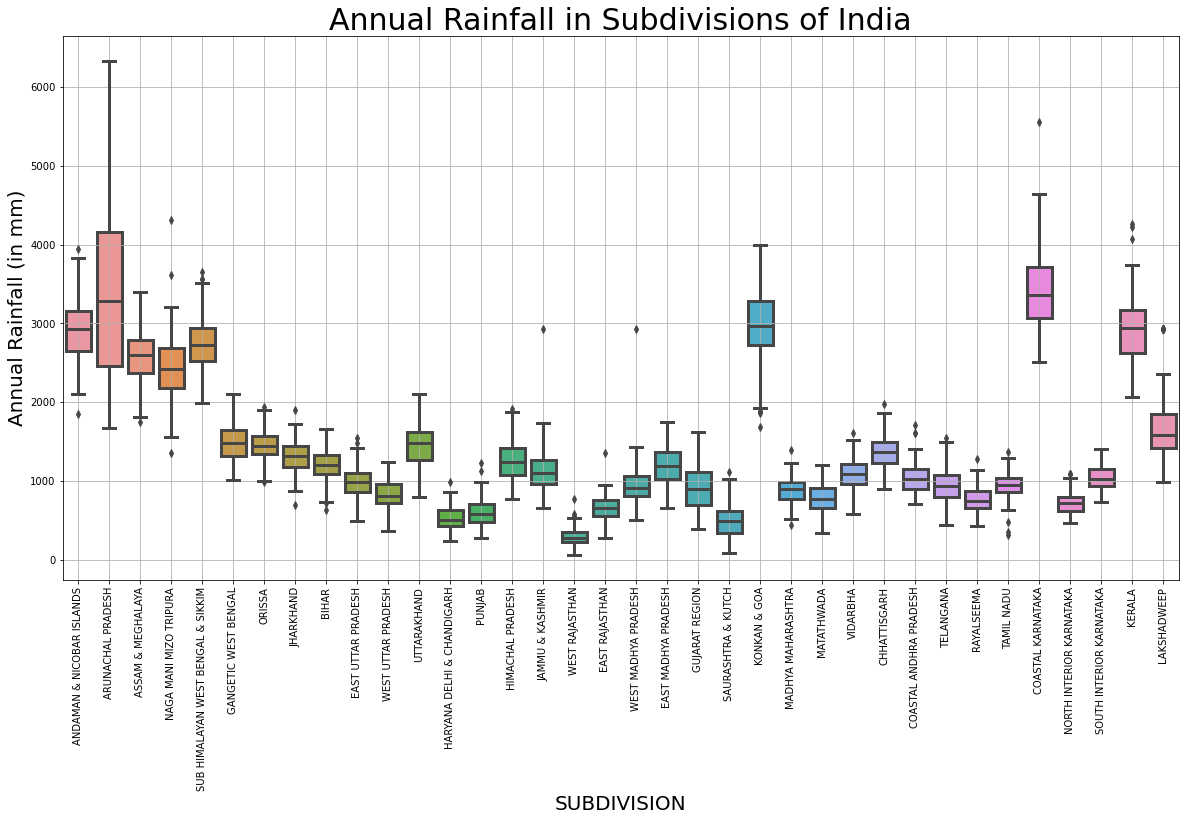

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=df, width=0.8,linewidth=3);
ax.set_xlabel('SUBDIVISION',fontsize=20)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=30)
ax.tick_params(axis='x',labelsize=10,rotation=90)
ax.tick_params(axis='y',labelsize=10,rotation=0)
plt.grid();


Insights:

From here, we can see that Arunachal Pradesh has recorded maximum rainfall annually but its median is similar to Coastal Karnataka, which means their average of total annual rainfall over years is approximately same, but the highest ever rainfall in a year is received by Arunachal Pradesh.

# Yearly Rainfall visualized in ascending order

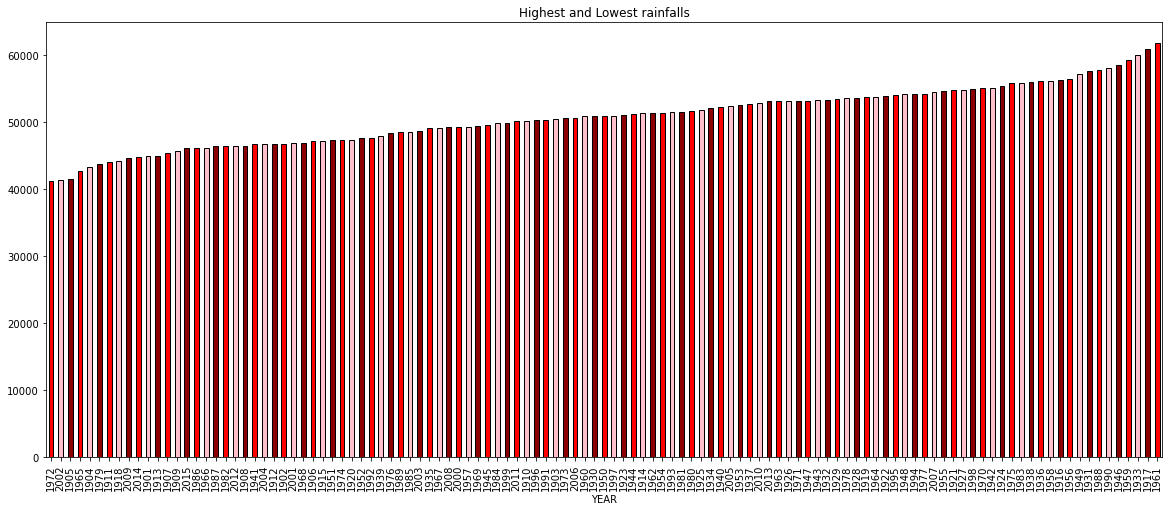

In [ ]:
yearly_rainfall = df.groupby(['YEAR']).sum()
x1 = yearly_rainfall.sort_values('ANNUAL')
fig = plt.figure(figsize=(20, 8))
ax = plt.xticks(rotation=90)
ax = x1['ANNUAL'].plot.bar(color=['red', 'pink', 'darkred'], edgecolor = 'black')
ax = plt.title('Highest and Lowest rainfalls')

Inference: 1972 and 2002 were the years with least amount of rainfall. 1917 and 1961 were the years with highest rainfall.

# Frequency of Flood and Drought during June-September

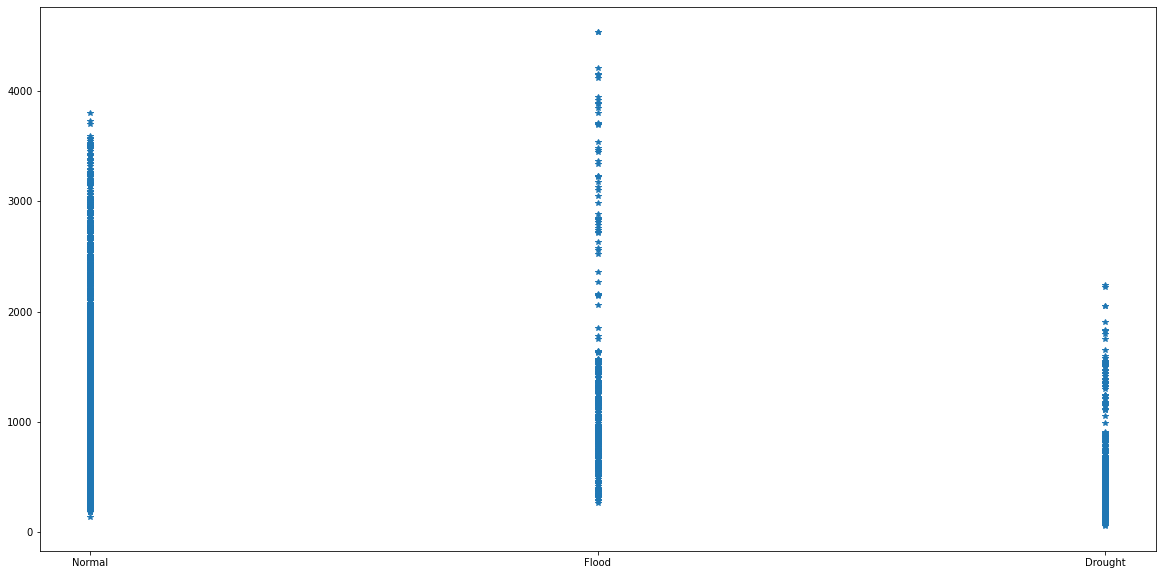

In [ ]:
y1=list(df['Prediction'])
x1=list(df['Jun-Sep'])
plt.plot(y1,x1,'*')
plt.show()

Inference:The frequency of flood is higher during the season June-September compared to drought

# India Flood Time Line

In [ ]:
india_flood_df= df[df['Prediction']=='Flood']
india_flood_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
32,ANDAMAN & NICOBAR ISLANDS,1934,7.3,172.9,6.9,131.4,62.0,708.4,323.5,924.9,...,338.1,240.2,46.1,3722.8,180.2,200.3,2717.9,624.4,2927.439423,Flood
55,ANDAMAN & NICOBAR ISLANDS,1961,82.1,99.4,33.2,88.1,973.1,383.3,304.9,557.1,...,379.9,280.6,144.5,3938.2,181.5,1094.5,1857.3,805.0,2927.439423,Flood
105,ANDAMAN & NICOBAR ISLANDS,2011,265.9,84.8,272.8,111.4,326.5,383.2,583.2,441.5,...,212.3,150.8,238.5,3828.0,350.7,710.7,2165.0,601.6,2927.439423,Flood
107,ANDAMAN & NICOBAR ISLANDS,2013,67.1,37.6,43.0,46.3,509.3,777.0,564.8,336.7,...,455.8,354.2,92.3,3757.8,104.7,598.6,2152.1,902.4,2927.439423,Flood
112,ARUNACHAL PRADESH,1918,10.4,11.0,191.2,144.6,861.1,1609.9,1303.0,692.6,...,125.2,7.8,13.7,5486.3,21.4,1196.9,4121.3,146.7,3418.857143,Flood


<AxesSubplot:xlabel='YEAR', ylabel='ANNUAL'>

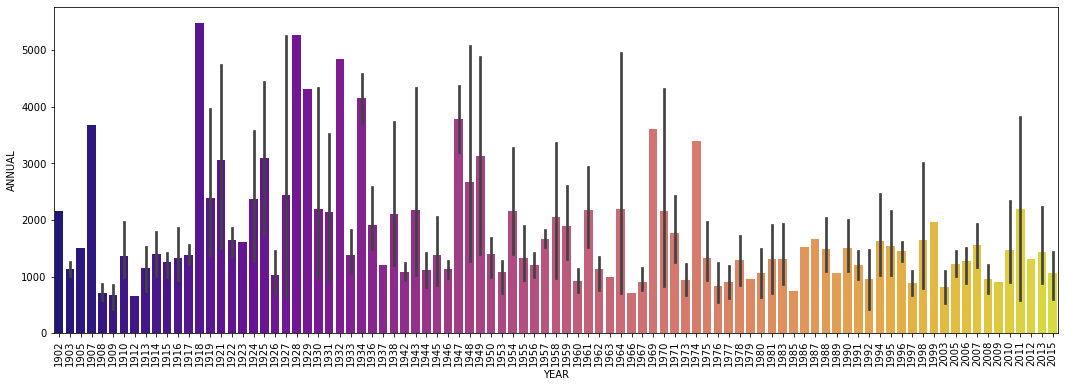

In [ ]:
# plotting a bar graph
from matplotlib import rcParams

rcParams['figure.figsize'] = 18,6

plt.xticks(rotation=90)
sns.barplot(x ='YEAR', y ='ANNUAL', data = india_flood_df, 
            palette ='plasma')

Inference: Taking in to account of all subdivisions, India suffered most number of floods during the year 1918 

# India Drought Time Line

In [ ]:
india_drought_df= df[df['Prediction']=='Drought']
india_drought_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
73,ANDAMAN & NICOBAR ISLANDS,1979,35.5,9.4,3.9,64.8,146.3,282.8,455.9,173.6,...,163.5,169.8,13.6,1849.4,44.9,215.0,1242.5,347.0,2927.439423,Drought
80,ANDAMAN & NICOBAR ISLANDS,1986,14.8,0.6,1.5,8.2,302.6,312.2,308.5,444.0,...,176.1,163.5,47.0,2187.8,15.4,312.3,1473.6,386.5,2927.439423,Drought
84,ANDAMAN & NICOBAR ISLANDS,1990,13.4,0.2,24.6,87.5,424.6,291.0,213.2,293.3,...,133.6,291.1,100.3,2183.4,13.6,536.8,1108.0,525.1,2927.439423,Drought
86,ANDAMAN & NICOBAR ISLANDS,1992,75.9,10.9,0.0,5.1,241.7,392.0,348.2,3372.3,...,257.3,64.3,7.2,2098.7,86.8,246.8,1436.2,328.8,2927.439423,Drought
146,ARUNACHAL PRADESH,1952,17.2,24.5,189.6,151.5,235.1,276.8,320.6,481.1,...,257.9,43.9,29.7,2396.1,41.7,576.2,1446.7,331.5,3418.857143,Drought


<AxesSubplot:xlabel='YEAR', ylabel='ANNUAL'>

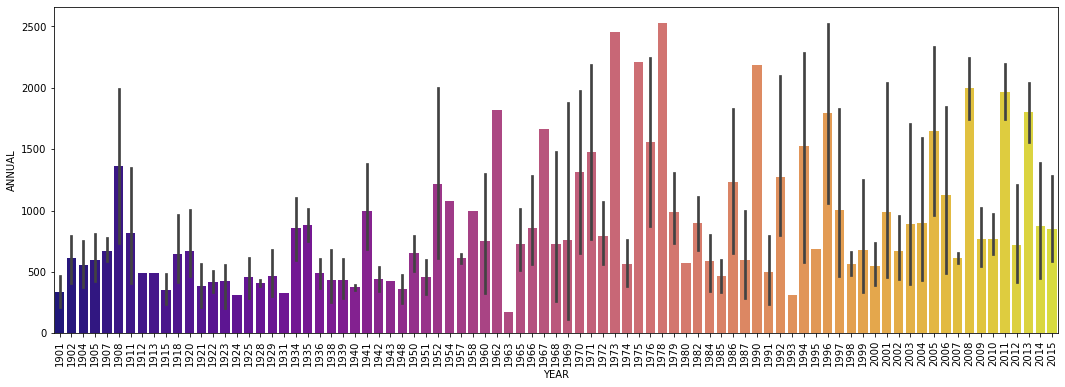

In [ ]:
# plotting a bar graph
from matplotlib import rcParams

rcParams['figure.figsize'] = 18,6

plt.xticks(rotation=90)
sns.barplot(x ='YEAR', y ='ANNUAL', data = india_drought_df, 
            palette ='plasma')

Inference: Taking in to account of all subdivisions, India suffered most number of droughts during the years 1978 & 1996 

# Kerala Flood Time Line

In [ ]:
df2=df.query("SUBDIVISION == 'KERALA'")
df2.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
3887,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,...,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1,2925.487826,Normal
3888,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,...,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2,2925.487826,Normal
3889,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,...,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1,2925.487826,Normal
3890,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,...,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3,2925.487826,Normal
3891,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,...,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1,2925.487826,Normal


In [ ]:
kerala_flood_df= df2[df2['Prediction']=='Flood']
kerala_flood_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
3893,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,...,309.7,219.1,52.8,3671.1,23.7,328.0,2737.8,581.7,2925.487826,Flood
3910,KERALA,1924,19.3,2.9,66.6,111.0,185.4,1011.7,1526.5,624.0,...,176.5,162.9,50.4,4226.4,22.2,363.0,3451.3,389.9,2925.487826,Flood
3919,KERALA,1933,1.0,9.3,36.9,139.5,738.8,859.3,773.4,479.5,...,397.0,126.1,42.3,4072.9,10.3,915.2,2581.9,565.5,2925.487826,Flood
3945,KERALA,1959,3.0,21.4,6.3,150.7,347.2,872.8,1155.7,397.3,...,200.4,151.9,34.0,3746.0,24.3,504.2,2831.2,386.3,2925.487826,Flood
3947,KERALA,1961,13.7,31.3,11.4,94.1,500.5,1005.2,1146.5,678.3,...,274.2,85.9,17.5,4257.8,45.0,606.0,3229.3,377.6,2925.487826,Flood


<AxesSubplot:xlabel='YEAR', ylabel='ANNUAL'>

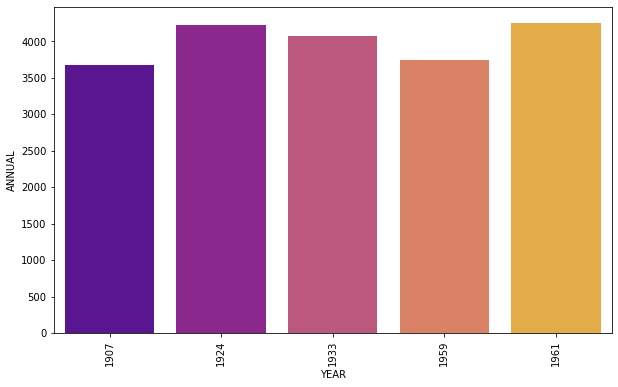

In [ ]:
# plotting a bar graph
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,6
plt.xticks(rotation=90)

sns.barplot(x ='YEAR', y ='ANNUAL', data = kerala_flood_df, 
            palette ='plasma')

Inference: The above graph depicts the years when Kerala experienced severe Flood during the time span of 110 years starting from 1905 to 2015 ie. 1907,1924,1933,1959 and 1961. The year 1924 & 1961 seems to be the worst hit.

# Kerala Drought Time Line

In [ ]:
kerala_drought_df= df2[df2['Prediction']=='Drought']
kerala_drought_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
3962,KERALA,1976,0.1,1.5,21.0,134.5,75.8,196.8,641.5,342.6,...,221.3,286.7,30.8,2068.8,1.6,231.3,1297.1,538.8,2925.487826,Drought
3972,KERALA,1986,5.6,18.7,11.2,63.1,126.7,597.9,324.8,340.3,...,165.5,194.7,9.5,2093.2,24.3,200.9,1498.4,369.6,2925.487826,Drought
3973,KERALA,1987,0.6,0.8,4.3,57.2,108.3,572.6,221.0,396.6,...,272.1,216.0,131.1,2137.6,1.4,169.7,1347.2,619.2,2925.487826,Drought
3998,KERALA,2012,7.4,11.0,21.0,171.1,95.3,430.3,362.6,501.6,...,187.5,112.9,9.4,2151.1,18.3,287.4,1535.6,309.8,2925.487826,Drought


<AxesSubplot:xlabel='YEAR', ylabel='ANNUAL'>

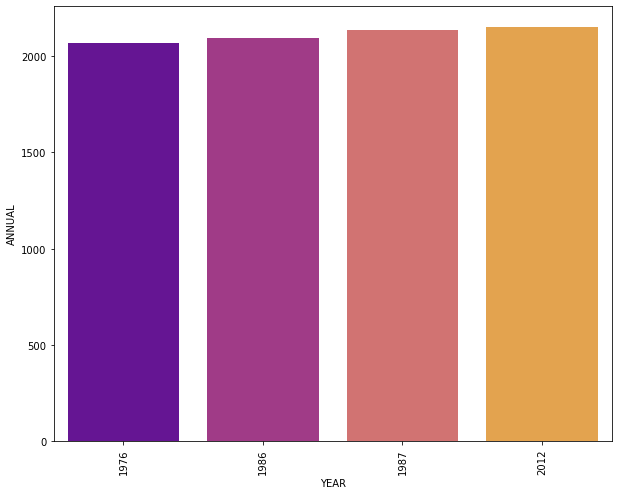

In [ ]:
# plotting a bar graph
# plotting a bar graph
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,8
plt.xticks(rotation=90)

sns.barplot(x ='YEAR', y ='ANNUAL', data = kerala_drought_df, 
            palette ='plasma')

Inference: The above graph depicts the years when Kerala experienced severe Drought during the time span of 110 years starting from 1905 to 2015 ie. 1976,1986,1987 and 2012. The year 2012 seems to be the worst hit.

# Heat Map of Rainfall

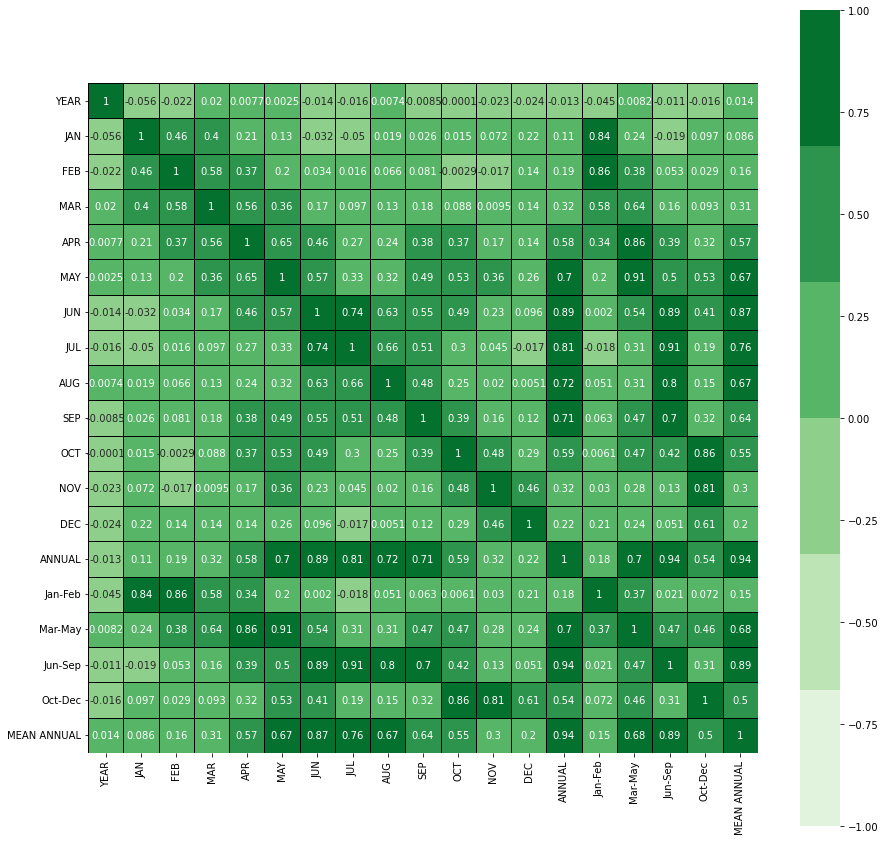

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,15)
colormap=sns.color_palette('Greens')
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True,cmap=colormap)

Insight:

From here, we can see that Annual rainfall has very high correlation to the rainfall received in the months of Jun-Sep. Also there is high correlation between seasonal rainfall(ie.'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec') and corresponding months rainfall. 

# Feature Reduction

Highly correlated features are dropped

In [ ]:
df.drop(['Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec'],axis=1,inplace=True)
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,MEAN ANNUAL,Prediction
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,2927.439423,Normal
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,2927.439423,Normal
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,2927.439423,Normal
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,2927.439423,Normal
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,2927.439423,Normal


# Outlier Handling 

In [ ]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'MEAN ANNUAL',
       'Prediction'],
      dtype='object')

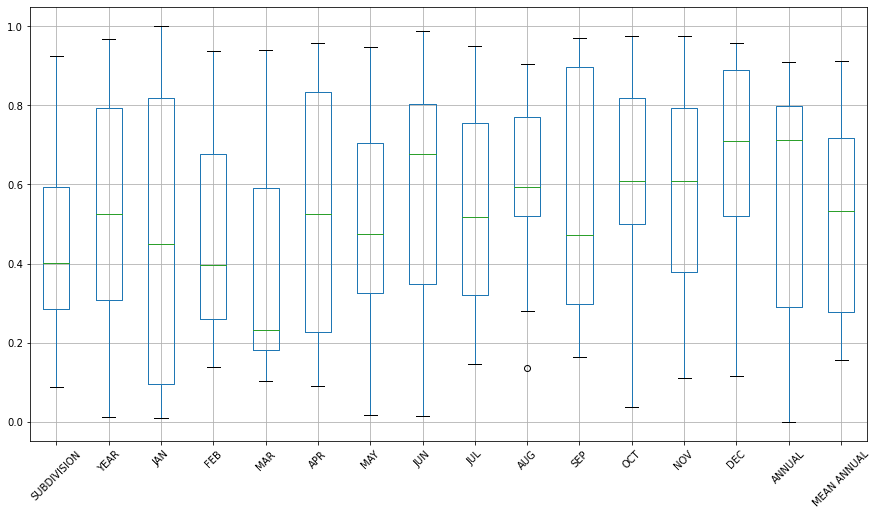

In [ ]:
df = pd.DataFrame(data = np.random.random(size=(15,16)), columns = ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'MEAN ANNUAL'],)

df.boxplot(figsize=(15,8));
plt.xticks(rotation=45);

Inference: A few outliers are detected in the  AUG column

In [ ]:
#Removing the outliers in AUG column

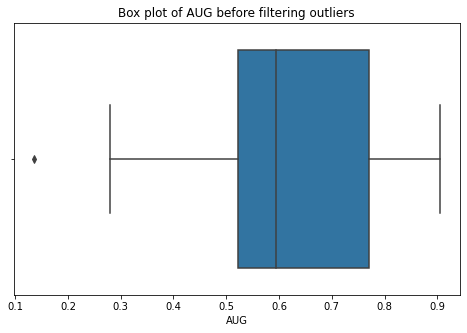

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(df['AUG'],data=df)
plt.title('Box plot of AUG before filtering outliers');



In [ ]:
Q1 = df['AUG'].quantile(0.25)
Q3 = df['AUG'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['AUG']=np.where(df['AUG']>upper_whisker,upper_whisker,np.where(df['AUG']<lower_whisker,lower_whisker,df['AUG']))

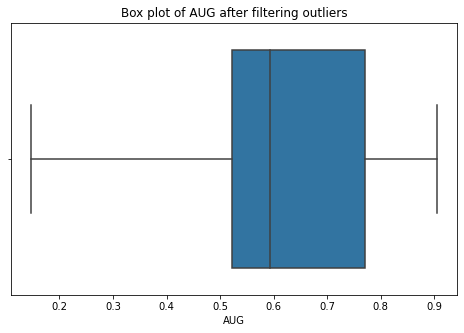

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(df['AUG'],data=df)
plt.title('Box plot of AUG after filtering outliers');

# Data Preprocessing Part II

# Encoding


In [ ]:
df.dtypes


SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
MEAN ANNUAL    float64
Prediction      object
dtype: object

In [ ]:
df['SUBDIVISION'].value_counts()

WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH                

In [ ]:
label_encoder = LabelEncoder()
 
# Encode labels in column 'Classification'.
df['SUBDIVISION']= label_encoder.fit_transform(df['SUBDIVISION'])
 
df['SUBDIVISION'].unique()

array([ 0,  1,  2, 21, 28, 10, 23, 15,  3,  9, 35, 31, 12, 24, 13, 14, 34,
        8, 33,  7, 11, 26, 17, 19, 20, 32,  4,  5, 30, 25, 29,  6, 22, 27,
       16, 18])

In [ ]:
df['SUBDIVISION'].value_counts()

33    115
8     115
6     115
29    115
25    115
30    115
5     115
4     115
32    115
20    115
19    115
17    115
26    115
11    115
7     115
16    115
34    115
27    115
14    115
13    115
24    115
12    115
31    115
35    115
9     115
3     115
15    115
23    115
10    115
28    115
21    115
2     115
22    115
18    114
0     110
1      97
Name: SUBDIVISION, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
 
# Encode labels in column 'Classification'.
df['Prediction']= label_encoder.fit_transform(df['Prediction'])
 
df['Prediction'].unique()

array([2, 1, 0])

In [ ]:
df['Prediction'].value_counts()

2    3296
1     419
0     401
Name: Prediction, dtype: int64

In [ ]:
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
MEAN ANNUAL    float64
Prediction       int32
dtype: object

In [ ]:
df.shape

(4116, 17)

In [ ]:
x=df.drop(['Prediction'],axis=1)

In [ ]:
y=df['Prediction']

In [ ]:
#Splitting data into train and test samples in the ratio 80:20

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
x_train.shape

(3292, 16)

In [ ]:
y_train.shape

(3292,)

In [ ]:
x_test.shape

(824, 16)

In [ ]:
y_test.shape

(824,)

# Logistic Regression¶

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        77
           1       0.96      0.93      0.95        86
           2       0.99      0.99      0.99       661

    accuracy                           0.99       824
   macro avg       0.98      0.97      0.98       824
weighted avg       0.99      0.99      0.99       824

[[ 76   0   1]
 [  0  80   6]
 [  1   3 657]]
accuracy is 0.9866504854368932


# KNN Classifier¶

In [ ]:
# Finding best k value
acc_values=[]

neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [ ]:
acc_values

[0.9296116504854369,
 0.9308252427184466,
 0.9344660194174758,
 0.9247572815533981,
 0.9271844660194175,
 0.9259708737864077,
 0.9199029126213593,
 0.9235436893203883,
 0.9211165048543689,
 0.9247572815533981,
 0.9223300970873787,
 0.9247572815533981]

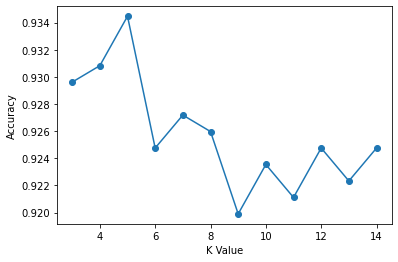

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy');

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        77
           1       0.94      0.57      0.71        86
           2       0.93      0.99      0.96       661

    accuracy                           0.93       824
   macro avg       0.95      0.80      0.86       824
weighted avg       0.94      0.93      0.93       824

[[ 65   0  12]
 [  0  49  37]
 [  2   3 656]]
accuracy is 0.9344660194174758


# Gradient Boosting Classifier¶

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86        77
           1       1.00      0.70      0.82        86
           2       0.94      1.00      0.97       661

    accuracy                           0.95       824
   macro avg       0.97      0.82      0.88       824
weighted avg       0.95      0.95      0.94       824

[[ 59   0  18]
 [  0  60  26]
 [  1   0 660]]
accuracy is 0.9453883495145631


# Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(20)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        77
           1       0.98      0.47      0.63        86
           2       0.90      0.99      0.94       661

    accuracy                           0.91       824
   macro avg       0.93      0.70      0.78       824
weighted avg       0.91      0.91      0.89       824

[[ 50   0  27]
 [  0  40  46]
 [  4   1 656]]
accuracy is 0.9053398058252428


# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred= gnb.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.15      0.71      0.24        77
           1       0.18      0.19      0.18        86
           2       0.85      0.47      0.60       661

    accuracy                           0.46       824
   macro avg       0.39      0.46      0.34       824
weighted avg       0.72      0.46      0.53       824

[[ 55   4  18]
 [ 34  16  36]
 [283  69 309]]
accuracy is 0.46116504854368934


# Decision Tree Classifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        77
           1       0.92      0.84      0.88        86
           2       0.96      0.98      0.97       661

    accuracy                           0.96       824
   macro avg       0.94      0.90      0.92       824
weighted avg       0.96      0.96      0.96       824

[[ 67   0  10]
 [  0  72  14]
 [  5   6 650]]
Accuracy is  0.9575242718446602


# SVM

In [ ]:
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        77
           1       0.95      0.24      0.39        86
           2       0.85      1.00      0.92       661

    accuracy                           0.86       824
   macro avg       0.94      0.54      0.62       824
weighted avg       0.88      0.86      0.83       824

[[ 30   0  47]
 [  0  21  65]
 [  0   1 660]]
Accuracy is  0.8628640776699029


# Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()
gb_clf=GradientBoostingClassifier()

gnb_clf=GaussianNB()
dt_clf=DecisionTreeClassifier()
svc_clf=SVC()
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('dt',dt_clf),('svc',svc_clf)],
    voting='hard')

In [ ]:
voting_clf = voting.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, gb_clf,gnb_clf,dt_clf,svc_clf,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9635922330097088
RandomForestClassifier 0.8883495145631068
KNeighborsClassifier 0.9344660194174758
GradientBoostingClassifier 0.9453883495145631
GaussianNB 0.46116504854368934
DecisionTreeClassifier 0.9502427184466019
SVC 0.8628640776699029
VotingClassifier 0.9490291262135923


In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('dt',dt_clf),('svc',svc_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.934466
1   LR  0.986650
2   DT  0.957524
3   RF  0.906553
4   GB  0.945388
5  GNB  0.461165
6  SVC  0.862864
7   EL  0.949029


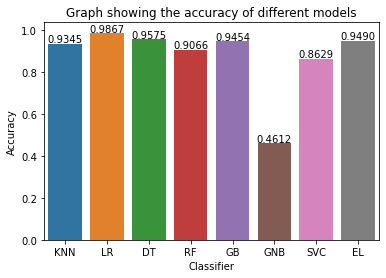

In [ ]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.title('Graph showing the accuracy of different models')    
plt.show()

In [ ]:
Inference: Comparing different models, Logistic Regression shows highest accuracy and seem to be the best of all models 

In [ ]:
#Check the pattern of distribution of data in the dataset

In [ ]:
x.describe()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,MEAN ANNUAL
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,17.593294,1958.218659,18.990051,21.809836,27.365706,43.155708,85.943166,230.527625,347.304178,291.611953,197.714867,95.838230,40.384302,19.196805,1420.587907,1416.933038
std,10.344106,33.140898,33.585447,35.896784,46.925485,67.804255,123.407435,234.718751,269.319112,196.893709,135.624617,99.757827,69.320172,42.831405,908.963454,856.290787
min,0.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,292.673043
25%,9.000000,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,827.114783
50%,18.000000,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.600000,174.100000,65.750000,9.700000,3.100000,1125.450000,1095.459130
75%,27.000000,1987.000000,22.200000,26.825000,31.400000,50.200000,97.725000,306.150000,418.225000,379.125000,266.400000,148.700000,46.500000,17.700000,1667.200000,1490.487826
max,35.000000,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,3372.300000,1222.000000,948.300000,648.900000,617.500000,6331.100000,3418.857143


In [ ]:
type(x)

pandas.core.frame.DataFrame

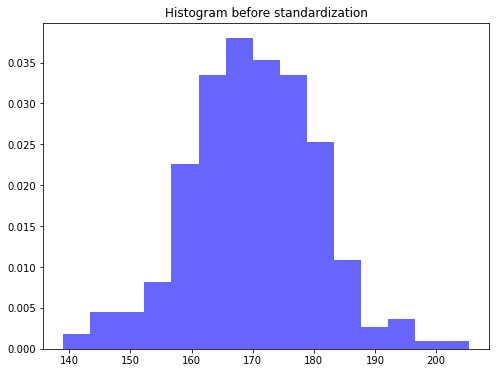

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
# Generating some random data
# for an example
data = np.random.normal(170, 10, 250)
  
# Plotting the histogram.
plt.figure(figsize=(8,6))
plt.hist(data, bins=15, density=True, alpha=0.6, color='b')
plt.title('Histogram before standardization')  
plt.show()

In [ ]:
# The data are skewly distributed

# Data preprocessing(Part III)

# Feature Importance

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

ANNUAL         24.788190
MEAN ANNUAL    14.659327
SEP             7.221272
JUL             5.846813
AUG             5.792199
OCT             5.192429
JUN             4.851303
MAY             4.166554
APR             4.092689
SUBDIVISION     4.045145
FEB             3.558765
MAR             3.500536
YEAR            3.391853
JAN             3.295176
NOV             2.949173
DEC             2.648575
dtype: float64

Inference: From the above it is seen that the features ANNUAL and MEAN ANNUAL have high weightage in prediction
    All features have importance (no value<1), so we cannot do feature reduction without effecting models accuracy and precision

# Applying standardized feature values to logistic regression model

In [ ]:
x1=x

In [ ]:
scalar = StandardScaler()
x1=scalar.fit_transform(x1)
x1=pd.DataFrame(x1)

In [ ]:
x1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03,4.116000e+03
mean,-1.748261e-15,-2.447346e-15,-3.677411e-16,-3.101072e-15,-2.313693e-15,-3.915991e-16,5.733994e-16,-3.721917e-16,6.101371e-17,-1.462765e-16,-2.566244e-16,-4.960399e-16,-2.267056e-15,-3.832373e-16,-1.477263e-16,1.752715e-15
std,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00
min,-1.701010e+00,-1.726737e+00,-5.654937e-01,-6.076446e-01,-5.832445e-01,-6.365523e-01,-6.965027e-01,-9.805590e-01,-1.289720e+00,-1.481243e+00,-1.457249e+00,-9.608256e-01,-5.826473e-01,-4.482491e-01,-1.494508e+00,-1.313101e+00
25%,-8.308440e-01,-8.515788e-01,-5.476266e-01,-5.909279e-01,-5.619315e-01,-5.923019e-01,-6.268063e-01,-6.819739e-01,-6.365126e-01,-6.880789e-01,-7.161433e-01,-8.144534e-01,-5.725480e-01,-4.459140e-01,-6.757285e-01,-6.888897e-01
50%,3.932239e-02,-6.598658e-03,-3.868232e-01,-4.209756e-01,-4.148720e-01,-4.049752e-01,-3.990776e-01,-3.904194e-01,-2.317391e-01,-1.626047e-01,-1.741405e-01,-3.016494e-01,-4.426999e-01,-3.758635e-01,-3.247367e-01,-3.754717e-01
75%,9.094888e-01,8.685594e-01,9.558721e-02,1.397277e-01,8.598280e-02,1.039042e-01,9.548262e-02,3.222221e-01,2.633658e-01,4.445225e-01,5.064971e-01,5.299654e-01,8.823464e-02,-3.495068e-02,2.713443e-01,8.590975e-02
max,1.682970e+00,1.713540e+00,1.681617e+01,1.063428e+01,1.232389e+01,8.141249e+00,8.774093e+00,5.877417e+00,7.484581e+00,1.564835e+01,7.553272e+00,8.546350e+00,8.779402e+00,1.397049e+01,5.402977e+00,2.338186e+00


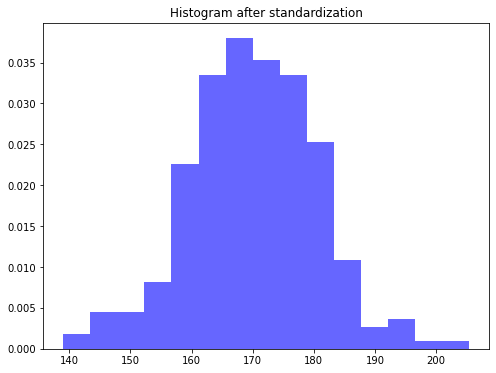

In [ ]:
# Plotting the histogram.
plt.figure(figsize=(8,6))
plt.hist(data, bins=15, density=True, alpha=0.6, color='b')
plt.title('Histogram after standardization')  
plt.show()

In [ ]:
#Standardization does not seem to  yield any result

In [ ]:
#Splitting into train and test sample
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.2)

In [ ]:
#Applying new standardized feature values to logistic regression model

In [ ]:
lr = LogisticRegression()
lr.fit(x1_train, y_train)

y_pred = lr.predict(x1_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        77
           1       0.96      0.63      0.76        86
           2       0.93      1.00      0.96       661

    accuracy                           0.94       824
   macro avg       0.96      0.80      0.86       824
weighted avg       0.94      0.94      0.93       824

[[ 59   0  18]
 [  0  54  32]
 [  0   2 659]]
accuracy is 0.9368932038834952


Inference: As standardization of values had no impact in the dataset, there is no improvment in the accuracy score of Logistic Regression

# Fine tuning of hyper parameters

In [ ]:
#Changing values of n_estimators,max_depth,random_state and criterion to see if performance of model improves

rft=RandomForestClassifier(n_estimators=850,max_depth=100, random_state=30, criterion='entropy', max_features='sqrt')

In [ ]:
rft.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       n_estimators=850, random_state=30)

In [ ]:
y_pred=rft.predict(x_test)
f1_score(y_test,y_pred,average='weighted')

0.8862713563680522

Inference: Changing few of hyperparameters like n_estimators=850,max_depth=100, random_state=30, criterion='entropy', max_features='sqrt',does not  increase the accuracy. Fine tuning does not seem to increase the efficiency of the model.